# Devoir maison numero 1 

##                                   Budan de Russé Alexis  & Nadjar Bruce



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

### Récupération des données sous forme de dataframe puis réduction de celles-ci. 

In [2]:
df_A=pd.read_csv("trainA", delimiter=" ", header=None, names=["x1","x2","y"])
df_A[['x1','x2']]=(df_A[['x1','x2']]-df_A[['x1','x2']].mean())/df_A[['x1','x2']].std()

df_B=pd.read_csv("trainB", delimiter=" ", header=None, names=["x1","x2","y"])
df_B[['x1','x2']]=(df_B[['x1','x2']]-df_B[['x1','x2']].mean())/df_B[['x1','x2']].std()

df_C=pd.read_csv("trainC", delimiter=" ", header=None, names=["x1","x2","y"])
df_C[['x1','x2']]=(df_C[['x1','x2']]-df_C[['x1','x2']].mean())/df_C[['x1','x2']].std()

df_testA=pd.read_csv("testA", delimiter=" ", header=None, names=["x1","x2","y"])
df_testA[['x1','x2']]=(df_testA[['x1','x2']]-df_testA[['x1','x2']].mean())/df_testA[['x1','x2']].std()

df_testB=pd.read_csv("testB", delimiter=" ", header=None, names=["x1","x2","y"])
df_testB[['x1','x2']]=(df_testB[['x1','x2']]-df_testB[['x1','x2']].mean())/df_testB[['x1','x2']].std()

df_testC=pd.read_csv("testC", delimiter=" ", header=None, names=["x1","x2","y"])
df_testC[['x1','x2']]=(df_testC[['x1','x2']]-df_testC[['x1','x2']].mean())/df_testC[['x1','x2']].std()

df_A.head()

,x1,x2,y
0,1.606544,-0.797493,1
1,-0.323358,0.951783,0
2,1.146513,-0.167746,1
3,0.107355,1.384039,0
4,0.534717,0.622109,0


# 1) Generative model LDA

Dans ce DM
    toutes les fonctions ne renverront que les missed case ratio, sinon les fonctions affichent les paramètres importants ainsi que les courbes. 
    Chaque méthode s'articulera en deux fonctions, une pour afficher les train et une autre pour les tests.


In [3]:
def Generative_LDA(df,affichage=False,affichage_courbe=False,affichage_courbe_x4=False,ax=None): 
    
    # la variable 'affichage' gère l'affichage des constantes calculees
    # la variable affichage_courbe permet d'afficher le nuage de point avec la droite p(y=1|X=x)=0.5
    # les variables affichage_courbe_x4 et ax sont utilisées pour superposés les différentes méthodes sur 
    ## une unique figure
    
    
    N0=sum(df['y']==0)
    if affichage:
        print('N0 = ',N0,'\n')

    N1=sum(df['y']==1)
    if affichage:
        print('N1 = ',N1,'\n')

    df_0=df[df['y']==0]
    df_1=df[df['y']==1]

    mu_0=np.array([sum(df['x1']*(1-df['y'])/N0),sum(df['x2']*(1-df['y'])/N0)])
    if affichage:
        print('mu0 :',mu_0,'\n')

    mu_1=np.array([sum(df['x1']*df['y']/N1),sum(df['x2']*df['y']/N1)])
    if affichage:
        print('mu1 :',mu_1,'\n')



    Sigma0=[]
    for i in list(df_0.index):
        X=np.array([[df_0['x1'][i],df_0['x2'][i]]])
        Sigma0.append(1/N0*np.dot((X-mu_0).T,(X-mu_0)))
    Sigma0=sum(Sigma0)

    Sigma1=[]
    for i in list(df_1.index):
        X=np.array([[df_1['x1'][i],df_1['x2'][i]]])
        Sigma1.append(1/N1*np.dot((X-mu_1).T,(X-mu_1)))
    Sigma1=sum(Sigma1)

    Sigma=1/(N1+N0)*(N1*Sigma1+N0*Sigma0)
    if affichage:
        print('Sigma = ',Sigma,'\n')

    inv_cov=np.linalg.inv(Sigma)

    pi=1/len(df)*sum(df['y'])
    if affichage:
        print('pi = ',pi,'\n')


    # Mise en forme des résultats avec la forme d'une regression logistique

    w= np.dot((mu_1-mu_0),inv_cov)
    if affichage:
        print('w = ',w,'\n')

    b=np.log(pi/(1-pi))+1/2*np.dot((mu_0-mu_1),inv_cov.dot(np.transpose(np.matrix(mu_0+mu_1))))
    b=b[0,0]
    if affichage:
        print('b = ',b,'\n')

    Ordonnee=[] # Droite p(y=1|X=x)=0.5
    for i in range(N1+N0):
        Ordonnee.append(-(b+w[0]*df['x1'][i])/w[1])

    Miss_class=0
    for i in range(N1+N0):
        if df['y'][i]==0:
            if df['x2'][i]<-(b+w[0]*df['x1'][i])/w[1]:
                Miss_class+=1
        if df['y'][i]==1:
            if df['x2'][i]>-(b+w[0]*df['x1'][i])/w[1]:
                Miss_class+=1
    
    # Tracé
    if affichage_courbe:
        figure=plt.figure(figsize = (10, 10))
        cmap = cm.get_cmap('Spectral')
        plt.scatter(x=df['x1'],y=df['x2'],c=df['y'],marker='o',cmap='coolwarm')
        plt.plot(list(df['x1']) , Ordonnee)
        plt.title('Représentation du plan (x1,x2) (Generative LDA)',fontsize= 20)
        plt.xlabel('X1',fontsize= 'x-large')
        plt.ylabel('X2',fontsize = 'x-large')
        plt.show()
        print('Miss class : ',int(Miss_class/(N1+N0)*10000)/100,'%','\n \n \n \n \n')
        
    if affichage_courbe_x4:
        cmap = cm.get_cmap('Spectral')
        ax.scatter(x=df['x1'],y=df['x2'],c=df['y'],marker='o',cmap='coolwarm')
        ax.plot(list(df['x1']) , Ordonnee)
        ax.set_title('Représentation du plan (x1,x2) (Generative LDA)')
    return(int(Miss_class/(N1+N0)*10000)/100)

In [4]:
def Generative_LDA_test(df,df_test, affichage=False, affichage_courbe=False,affichage_courbe_x4=False,ax=None):
    
    # la variable 'affichage' gère l'affichage des constantes calculees
    # la variable affichage_courbe permet d'afficher le nuage de point avec la droite p(y=1|X=x)=0.5
    # les variables affichage_courbe_x4 et ax sont utilisées pour superposés les différentes méthodes sur 
    ## une unique figure
    
    N0=sum(df['y']==0)
    #print('N0 = ',N0,'\n')

    N1=sum(df['y']==1)
    #print('N1 = ',N1,'\n')

    df_0=df[df['y']==0]
    df_1=df[df['y']==1]

    mu_0=np.array([sum(df['x1']*(1-df['y'])/N0),sum(df['x2']*(1-df['y'])/N0)])
    #print('mu0 :',mu_0,'\n')

    mu_1=np.array([sum(df['x1']*df['y']/N1),sum(df['x2']*df['y']/N1)])
    #print('mu1 :',mu_1,'\n')



    Sigma0=[]
    for i in list(df_0.index):
        X=np.array([[df_0['x1'][i],df_0['x2'][i]]])
        Sigma0.append(1/N0*np.dot((X-mu_0).T,(X-mu_0)))
    Sigma0=sum(Sigma0)

    Sigma1=[]
    for i in list(df_1.index):
        X=np.array([[df_1['x1'][i],df_1['x2'][i]]])
        Sigma1.append(1/N1*np.dot((X-mu_1).T,(X-mu_1)))
    Sigma1=sum(Sigma1)

    Sigma=1/(N1+N0)*(N1*Sigma1+N0*Sigma0)
    #print('Sigma = ',Sigma,'\n')

    inv_cov=np.linalg.inv(Sigma)

    pi=1/len(df)*sum(df['y'])
    #print('pi = ',pi,'\n')


    # Mise en forme des résultats avec la forme d'une regression logistique

    w= np.dot((mu_1-mu_0),inv_cov)
    #print('w = ',w,'\n')

    b=np.log(pi/(1-pi))+1/2*np.dot((mu_0-mu_1),inv_cov.dot(np.transpose(np.matrix(mu_0+mu_1))))
    b=b[0,0]
    #print('b = ',b,'\n')

    Ordonnee=[] # Droite P(y=1!x=0.5)
    for i in range(N1+N0):
        Ordonnee.append(-(b+w[0]*df['x1'][i])/w[1])

    
    Miss_class=0
    for i in range(N1+N0):
        if df_test['y'][i]==0:
            if df_test['x2'][i]<-(b+w[0]*df_test['x1'][i])/w[1]:
                Miss_class+=1
        if df_test['y'][i]==1:
            if df_test['x2'][i]>-(b+w[0]*df_test['x1'][i])/w[1]:
                Miss_class+=1
    
    
    # Tracé
    if affichage_courbe:
        figure=plt.figure(figsize = (10, 10))
        cmap = cm.get_cmap('Spectral')
        plt.scatter(x=df_test['x1'],y=df_test['x2'],c=df_test['y'],marker='o',cmap='coolwarm')
        plt.plot(list(df['x1']) , Ordonnee)
        plt.title('Représentation du plan (x1,x2) (Generative LDA test)',fontsize= 20)
        plt.xlabel('X1',fontsize= 'x-large')
        plt.ylabel('X2',fontsize = 'x-large')
        plt.show()
        print('Miss Class test = ',int(Miss_class/(N1+N0)*10000)/100,'%')
        
    if affichage_courbe_x4:
        cmap = cm.get_cmap('Spectral')
        ax.scatter(x=df_test['x1'],y=df_test['x2'],c=df_test['y'],marker='o',cmap='coolwarm')
        ax.plot(list(df['x1']) , Ordonnee)
        ax.set_title('Représentation du plan (x1,x2) (Generative LDA test)')
    return(int(Miss_class/(len(df_test['y']))*10000)/100)

In [5]:
#Generative_LDA(df_A,affichage=True,affichage_courbe=True)

In [6]:
#Generative_LDA_test(df_A,df_testA,affichage=True,affichage_courbe=True)

# 2) Regression logistique



In [7]:
def Logistic_reg(df, affichage=False,affichage_courbe=False,affichage_courbe_x4=False,ax=None):
    
    # la variable 'affichage' gère l'affichage des constantes calculees
    # la variable affichage_courbe permet d'afficher le nuage de point avec la droite p(y=1|X=x)=0.5
    # les variables affichage_courbe_x4 et ax sont utilisées pour superposés les différentes méthodes sur 
    ## une unique figure
    
    Ones=[1 for i in range(len(df))] 
    df_tild=df.copy()
    df_tild['one']=Ones # On ajoute une colonne de 1 pour avoir la constante b 

    X=df_tild[['one','x1','x2']].values # Design Matrix (df sous forme de matrice)

    y=df_tild[['y']].values       
    n=len(y)
    def grad_hess(w): # Fonction de calcul du gradient et de la Hessienne.
        grad=0
        
        L=[]
        for i in range(n):
            eta_i=1/(1+np.exp(-np.dot(w.T,X[i])))
            grad+=(y[i]-eta_i)*X[i]
            L.append(eta_i*(1-eta_i))
        L=np.array(L)
        hess=np.dot(-X.T,np.dot(np.diag(L),X))
        return(grad,hess)

    w=np.array([1,1,1])
    eps=1e-10

    while(np.linalg.norm(grad_hess(w)[0])>eps):
        grad,hess=grad_hess(w)
        w = w - np.dot(grad,np.linalg.inv(hess))
    if affichage:
        print('w = ',w)

    # Tracé 

    Ordonnee=[] # Droite P(y=1!x=0.5)
    for i in range(len(df)):
        Ordonnee.append(-(w[0]+w[1]*df['x1'][i])/w[2])

    Miss_class=0
    for i in range(n):
        if df['y'][i]==0:
            if df['x2'][i]<-(w[0]+w[1]*df['x1'][i])/w[2]:
                Miss_class+=1
        if df['y'][i]==1:
            if df['x2'][i]>-(w[0]+w[1]*df['x1'][i])/w[2]:
                Miss_class+=1    
    if affichage_courbe:
        figure=plt.figure(figsize = (10, 10))
        cmap = cm.get_cmap('Spectral')
        plt.scatter(x=df['x1'],y=df['x2'],c=df['y'],marker='o',cmap='coolwarm')
        plt.plot(list(df['x1']) , Ordonnee)
        plt.title('Représentation du plan (x1,x2) (Logistic)',fontsize= 20)
        plt.xlabel('X1',fontsize= 'x-large')
        plt.ylabel('X2',fontsize = 'x-large')
        plt.show()
        print('Miss class : ',int(Miss_class/(n)*1000000)/10000,'%','\n \n \n \n \n')
        
    if affichage_courbe_x4:
        cmap = cm.get_cmap('Spectral')
        ax.scatter(x=df['x1'],y=df['x2'],c=df['y'],marker='o',cmap='coolwarm')
        ax.plot(list(df['x1']) , Ordonnee)
        ax.set_title('Représentation du plan (x1,x2) (Logistic)')
    return(int(Miss_class/(n)*1000000)/10000)

In [8]:
def Logistic_reg_test(df,df_test,affichage=False,affichage_courbe=False,affichage_courbe_x4=False,ax=None): 
    
    # la variable 'affichage' gère l'affichage des constantes calculees
    # la variable affichage_courbe permet d'afficher le nuage de point avec la droite p(y=1|X=x)=0.5
    # les variables affichage_courbe_x4 et ax sont utilisées pour superposés les différentes méthodes sur 
    ## une unique figure
    Ones=[1 for i in range(len(df))] 
    df_tild=df.copy()
    df_tild['one']=Ones # On ajoute une colonne de 1 pour avoir la constante b 

    X=df_tild[['one','x1','x2']].values # Design Matrix (df sous forme de matrice)

    y=df_tild[['y']].values 
    
    n=len(y)
    def grad_hess(w): # Fonction de calcul du gradient et de la Hessienne.
        grad=0
        
        L=[]
        for i in range(n):
            eta_i=1/(1+np.exp(-np.dot(w.T,X[i])))
            grad+=(y[i]-eta_i)*X[i]
            L.append(eta_i*(1-eta_i))
        L=np.array(L)
        hess=np.dot(-X.T,np.dot(np.diag(L),X))
        return(grad,hess)

    w=np.array([1,1,1])
    eps=1e-10

    while(np.linalg.norm(grad_hess(w)[0])>eps):
        grad,hess=grad_hess(w)
        w = w - np.dot(grad,np.linalg.inv(hess))

    #print('w = ',w)

    # Tracé 

    Ordonnee=[] # Droite P(y=1!x=0.5)
    for i in range(len(df)):
        Ordonnee.append(-(w[0]+w[1]*df['x1'][i])/w[2])

    Miss_class=0
    for i in range(n):
        if df_test['y'][i]==0:
            if df_test['x2'][i]<-(w[0]+w[1]*df_test['x1'][i])/w[2]:
                Miss_class+=1
        if df_test['y'][i]==1:
            if df_test['x2'][i]>-(w[0]+w[1]*df_test['x1'][i])/w[2]:
                Miss_class+=1    
    
    if affichage_courbe:
        figure=plt.figure(figsize = (10, 10))
        cmap = cm.get_cmap('Spectral')
        plt.scatter(x=df_test['x1'],y=df_test['x2'],c=df_test['y'],marker='o',cmap='coolwarm')
        plt.plot(list(df['x1']) , Ordonnee)
        plt.title('Représentation du plan (x1,x2) (Logistic test)',fontsize= 20)
        plt.xlabel('X1',fontsize= 'x-large')
        plt.ylabel('X2',fontsize = 'x-large')
        plt.show()
        print('Miss Class test = ',int(Miss_class/(n)*10000)/100,'%')
        
    if affichage_courbe_x4:
        cmap = cm.get_cmap('Spectral')
        ax.scatter(x=df_test['x1'],y=df_test['x2'],c=df_test['y'],marker='o',cmap='coolwarm')
        ax.plot(list(df['x1']) , Ordonnee)
        ax.set_title('Représentation du plan (x1,x2) (Logistic test)')
    return(int(Miss_class/(len(df_test['y']))*10000)/100)

In [9]:
#Logistic_reg(df_B,affichage_courbe=True)

In [10]:
#Logistic_reg_test(df_B,df_testB,affichage_courbe=True)

# 3) Linear Regressions

In [11]:
def Linear_Regression(df, affichage=False,affichage_courbe=False,affichage_courbe_x4=False,ax=None):
    
    # la variable 'affichage' gère l'affichage des constantes calculees
    # la variable affichage_courbe permet d'afficher le nuage de point avec la droite p(y=1|X=x)=0.5
    # les variables affichage_courbe_x4 et ax sont utilisées pour superposés les différentes méthodes sur 
    ## une unique figure
    
    n=len(df)
    Ones=[1 for i in range(n)] 
    df_tild=df.copy()
    df_tild['one']=Ones # On ajoute une colonne de 1 pour avoir la constante b 
    
    X=df_tild[['one','x1','x2']].values # Design Matrix (df sous forme de matrice)
    
    y=df_tild[['y']].values
    
    w=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y).T
    if affichage:
        print('w = ', w)

    sigma_2=0
    for i in range(n):
        sigma_2+=(y[i]-np.dot(w,X[i]))**2

    sigma_2=sigma_2/n
    if affichage:
        print('sigma_2 = ',sigma_2)

    # Tracé 

    Ordonnee=[] # Droite P(y=1|x=0.5)
    for i in range(n):
        #Ordonnee.append((0.5-w[0,0]-w[0,1]*X[i,1])/w[0,2])
        Ordonnee.append((1-w[0,0]-w[0,1]*X[i,1]-np.sqrt(-2*sigma_2*np.log(np.sqrt(2*np.pi*sigma_2)/2)))/w[0,2])
        #Ordonnee.append((1-w[0,0]-w[0,1]*X[i,1]-np.sqrt(sigma_2*(2*np.log(2)-np.log(2*np.pi*sigma_2))))/w[0,2])
    Miss_class=0
    for i in range(n):
        if df['y'][i]==0:
            if df['x2'][i]<(1-w[0,0]-w[0,1]*X[i,1]-np.sqrt(-2*sigma_2*np.log(np.sqrt(2*np.pi*sigma_2)/2)))/w[0,2]:
                Miss_class+=1
        if df['y'][i]==1:
            if df['x2'][i]>(1-w[0,0]-w[0,1]*X[i,1]-np.sqrt(-2*sigma_2*np.log(np.sqrt(2*np.pi*sigma_2)/2)))/w[0,2]:
                Miss_class+=1
                
    if affichage_courbe:   
        figure=plt.figure(figsize = (10, 10))
        cmap = cm.get_cmap('Spectral')
        plt.scatter(x=df['x1'],y=df['x2'],c=df['y'],marker='o',cmap='coolwarm')
        plt.plot(list(df['x1']) , Ordonnee)
        plt.title('Représentation du plan (x1,x2) (Linear Regression)',fontsize= 20)
        plt.xlabel('X1',fontsize= 'x-large')
        plt.ylabel('X2',fontsize = 'x-large')
        plt.show()
        print('Miss class : ',int(Miss_class/(n)*1000000)/10000,'%','\n \n \n \n')
    if affichage_courbe_x4:
        cmap = cm.get_cmap('Spectral')
        ax.scatter(x=df['x1'],y=df['x2'],c=df['y'],marker='o',cmap='coolwarm')
        ax.plot(list(df['x1']) , Ordonnee)
        ax.set_title('Représentation du plan (x1,x2) (Linear Regression)')
    return(int(Miss_class/(n)*1000000)/10000)

In [12]:
def Linear_Regression_test(df,df_test,affichage=False,affichage_courbe=False,affichage_courbe_x4=False,ax=None):
    
    # la variable 'affichage' gère l'affichage des constantes calculees
    # la variable affichage_courbe permet d'afficher le nuage de point avec la droite p(y=1|X=x)=0.5
    # les variables affichage_courbe_x4 et ax sont utilisées pour superposés les différentes méthodes sur 
    ## une unique figure
    
    n=len(df)
    Ones=[1 for i in range(n)] 
    df_tild=df.copy()
    df_tild['one']=Ones # On ajoute une colonne de 1 pour avoir la constante b 

    X=df_tild[['one','x1','x2']].values # Design Matrix (df sous forme de matrice)
    
    
    y=df_tild[['y']].values
    
    n_test=len(df_test)

    w=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y).T
    #print('w = ', w)

    sigma_2=0
    for i in range(n):
        sigma_2+=(y[i]-np.dot(w,X[i]))**2

    sigma_2=sigma_2/n
    #print('sigma_2 = ',sigma_2)

    # Tracé 

    Ordonnee=[] # Droite P(y=1!x=0.5)
    for i in range(n):
        #Ordonnee.append((0.5-w[0,0]-w[0,1]*X[i,1])/w[0,2])
        Ordonnee.append((1-w[0,0]-w[0,1]*X[i,1]-np.sqrt(-2*sigma_2*np.log(np.sqrt(2*np.pi*sigma_2)/2)))/w[0,2])
    
    Miss_class=0

    for i in range(n_test):
        if df_test['y'][i]==0:
            if df_test['x2'][i]<(1-w[0,0]-w[0,1]*df_test['x1'][i]-np.sqrt(-2*sigma_2*np.log(np.sqrt(2*np.pi*sigma_2)/2)))/w[0,2]:
                Miss_class+=1
        if df_test['y'][i]==1:
            if df_test['x2'][i]>(1-w[0,0]-w[0,1]*df_test['x1'][i]-np.sqrt(-2*sigma_2*np.log(np.sqrt(2*np.pi*sigma_2)/2)))/w[0,2]:
                Miss_class+=1
    
    if affichage_courbe:
        figure=plt.figure(figsize = (10, 10))
        cmap = cm.get_cmap('Spectral')
        plt.scatter(x=df_test['x1'],y=df_test['x2'],c=df_test['y'],marker='o',cmap='coolwarm')
        plt.plot(list(df['x1']) , Ordonnee)
        plt.title('Représentation du plan (x1,x2) (Linear Regression test)',fontsize= 20)
        plt.xlabel('X1',fontsize= 'x-large')
        plt.ylabel('X2',fontsize = 'x-large')
        plt.show()
        print('Miss Class test  = ',int(Miss_class/(n)*10000)/100,'%')
        
        
    if affichage_courbe_x4: 
        cmap = cm.get_cmap('Spectral')
        ax.scatter(x=df_test['x1'],y=df_test['x2'],c=df_test['y'],marker='o',cmap='coolwarm')
        ax.plot(list(df['x1']) , Ordonnee)
        ax.set_title('Représentation du plan (x1,x2) (Linear Regression test)')
        return
    return(int(Miss_class/(n)*10000)/100)

In [13]:
#Linear_Regression(df_C,affichage=True,affichage_courbe=True)

In [14]:
#Linear_Regression_test(df_C,df_testC,affichage_courbe=True)

# 4) QDA Model

In [15]:
def QDA(df,affichage=False,affichage_courbe=False,affichage_courbe_x4=False,ax=None): 
    
    # la variable 'affichage' gère l'affichage des constantes calculees
    # la variable affichage_courbe permet d'afficher le nuage de point avec la droite p(y=1|X=x)=0.5
    # les variables affichage_courbe_x4 et ax sont utilisées pour superposés les différentes méthodes sur 
    ## une unique figure
    
    N0=sum(df['y']==0)
    if affichage:
        print('N0 = ',N0,'\n')

    N1=sum(df['y']==1)
    if affichage:
        print('N1 = ',N1,'\n')

    df_0=df[df['y']==0]
    df_1=df[df['y']==1]

    mu_0=np.array([sum(df['x1']*(1-df['y'])/N0),sum(df['x2']*(1-df['y'])/N0)])
    if affichage:
        print('mu0 :',mu_0,'\n')

    mu_1=np.array([sum(df['x1']*df['y']/N1),sum(df['x2']*df['y']/N1)])
    if affichage:
        print('mu1 :',mu_1,'\n')



    Sigma0=[]
    for i in list(df_0.index):
        X=np.array([[df_0['x1'][i],df_0['x2'][i]]])
        Sigma0.append(1/N0*np.dot((X-mu_0).T,(X-mu_0)))
    Sigma0=sum(Sigma0)

    Sigma1=[]
    for i in list(df_1.index):
        X=np.array([[df_1['x1'][i],df_1['x2'][i]]])
        Sigma1.append(1/N1*np.dot((X-mu_1).T,(X-mu_1)))
    Sigma1=sum(Sigma1)
    
    inv_cov_1=np.linalg.inv(Sigma1)
    inv_cov_0=np.linalg.inv(Sigma0)

    pi=1/len(df)*sum(df['y'])
    if affichage:
        print('pi = ',pi,'\n')


    # Mise en forme des résultats et tracé de la connique

    Q = inv_cov_0-inv_cov_1
    if affichage:
        print('Q = ',Q)
    
    Beta = np.dot(inv_cov_1,mu_1) - np.dot(inv_cov_0,mu_0)
    if affichage:
        print('Beta = ',Beta)
    
    Gamma = np.log(pi/(1-pi)) + 1/2 * np.log(np.linalg.det(Sigma0)) - 1/2 * np.log(np.linalg.det(Sigma1))\
            + 1/2 * np.dot(np.dot(mu_0.T,inv_cov_0),mu_0) - 1/2 * np.dot(np.dot(mu_1.T,inv_cov_1),mu_1)
    if affichage:
        print('Gamma = ',Gamma)
    
    # Tracé
    
    x = np.linspace(min(df['x1']-2), max(df['x1']+2), 1000)
    y = np.linspace(min(df['x2']-2), max(df['x2']+2), 1000)
    x, y = np.meshgrid(x, y)
    
    
    res = Gamma + Beta[0]*x + Beta[1]*y + 1/2 *( Q[0,0]*(x**2) + Q[1,1]*(y**2) + Q[0,1]*x*y + Q[1,0]*y*x)
    
    
    Miss_class=0
    for i in range(N1+N0):
        if df['y'][i]==0:
            if Gamma + Beta[0]*df['x1'][i] + Beta[1]*df['x2'][i] + 1/2 *( Q[0,0]*(df['x1'][i]**2) + Q[1,1]*(df['x2'][i]**2) + Q[0,1]*df['x1'][i]*df['x2'][i] + Q[1,0]*df['x2'][i]*df['x1'][i])>0:
                Miss_class+=1
        if df['y'][i]==1:
            if Gamma + Beta[0]*df['x1'][i] + Beta[1]*df['x2'][i] + 1/2 *( Q[0,0]*(df['x1'][i]**2) + Q[1,1]*(df['x2'][i]**2) + Q[0,1]*df['x1'][i]*df['x2'][i] + Q[1,0]*df['x2'][i]*df['x1'][i])<0:
                Miss_class+=1
    if affichage_courbe:
        figure=plt.figure(figsize = (10, 10))
        cmap = cm.get_cmap('Spectral')
        plt.scatter(x=df['x1'],y=df['x2'],c=df['y'],marker='o',cmap='coolwarm')
        plt.title('Représentation du plan (x1,x2) (QDA)',fontsize= 20)
        plt.xlabel('X1',fontsize= 'x-large')
        plt.ylabel('X2',fontsize = 'x-large')
        plt.contourf(x,y,res,0,cmap = cm.Pastel2_r, alpha = 0.5)
        plt.show()
        print('Miss class : ',int(Miss_class/(N1+N0)*10000)/100,'%','\n \n \n \n \n')
        
        
    if affichage_courbe_x4:
        cmap = cm.get_cmap('Spectral')
        ax.scatter(x=df['x1'],y=df['x2'],c=df['y'],marker='o',cmap='coolwarm')
        ax.set_title('Représentation du plan (x1,x2) (QDA)')
        ax.contourf(x,y,res,0,cmap = cm.Pastel2_r, alpha = 0.5)
    return(int(Miss_class/(N1+N0)*10000)/100)

In [16]:
def QDA_test(df,df_test,affichage=False,affichage_courbe=False,affichage_courbe_x4=False,ax=None): 
    
    # la variable 'affichage' gère l'affichage des constantes calculees
    # la variable affichage_courbe permet d'afficher le nuage de point avec la droite p(y=1|X=x)=0.5
    # les variables affichage_courbe_x4 et ax sont utilisées pour superposés les différentes méthodes sur 
    ## une unique figure
    
    
    N0=sum(df['y']==0)
    if affichage:
        print('N0 = ',N0,'\n')

    N1=sum(df['y']==1)
    if affichage:
        print('N1 = ',N1,'\n')

    df_0=df[df['y']==0]
    df_1=df[df['y']==1]

    mu_0=np.array([sum(df['x1']*(1-df['y'])/N0),sum(df['x2']*(1-df['y'])/N0)])
    if affichage:
        print('mu0 :',mu_0,'\n')

    mu_1=np.array([sum(df['x1']*df['y']/N1),sum(df['x2']*df['y']/N1)])
    if affichage:
        print('mu1 :',mu_1,'\n')



    Sigma0=[]
    for i in list(df_0.index):
        X=np.array([[df_0['x1'][i],df_0['x2'][i]]])
        Sigma0.append(1/N0*np.dot((X-mu_0).T,(X-mu_0)))
    Sigma0=sum(Sigma0)

    Sigma1=[]
    for i in list(df_1.index):
        X=np.array([[df_1['x1'][i],df_1['x2'][i]]])
        Sigma1.append(1/N1*np.dot((X-mu_1).T,(X-mu_1)))
    Sigma1=sum(Sigma1)
    
    inv_cov_1=np.linalg.inv(Sigma1)
    inv_cov_0=np.linalg.inv(Sigma0)

    pi=1/len(df)*sum(df['y'])
    if affichage:
        print('pi = ',pi,'\n')


    # Mise en forme des résultats et tracé de la connique

    Q = inv_cov_0-inv_cov_1
    if affichage:
        print('Q = ',Q)
    
    Beta = np.dot(inv_cov_1,mu_1) - np.dot(inv_cov_0,mu_0)
    if affichage:
        print('Beta = ',Beta)
    
    Gamma = np.log(pi/(1-pi)) + 1/2 * np.log(np.linalg.det(Sigma0)) - 1/2 * np.log(np.linalg.det(Sigma1))\
            + 1/2 * np.dot(np.dot(mu_0.T,inv_cov_0),mu_0) - 1/2 * np.dot(np.dot(mu_1.T,inv_cov_1),mu_1)
    if affichage:
        print('Gamma = ',Gamma)
    
    # Tracé
    
    x = np.linspace(min(df['x1']-2), max(df['x1']+2), 1000)
    y = np.linspace(min(df['x2']-2), max(df['x2']+2), 1000)
    x, y = np.meshgrid(x, y)
    
    
    res = Gamma + Beta[0]*x + Beta[1]*y + 1/2 *( Q[0,0]*(x**2) + Q[1,1]*(y**2) + Q[0,1]*x*y + Q[1,0]*y*x)
    
    
    Miss_class=0
    for i in range(len(df_test)):
        if df_test['y'][i]==0:
            if Gamma + Beta[0]*df_test['x1'][i] + Beta[1]*df_test['x2'][i] + 1/2 *( Q[0,0]*(df_test['x1'][i]**2) + Q[1,1]*(df_test['x2'][i]**2) + Q[0,1]*df_test['x1'][i]*df_test['x2'][i] + Q[1,0]*df_test['x2'][i]*df_test['x1'][i])>0:
                Miss_class+=1
        if df_test['y'][i]==1:
            if Gamma + Beta[0]*df_test['x1'][i] + Beta[1]*df_test['x2'][i] + 1/2 *( Q[0,0]*(df_test['x1'][i]**2) + Q[1,1]*(df_test['x2'][i]**2) + Q[0,1]*df_test['x1'][i]*df_test['x2'][i] + Q[1,0]*df_test['x2'][i]*df_test['x1'][i])<0:
                Miss_class+=1
                
    if affichage_courbe:
        figure=plt.figure(figsize = (10, 10))
        cmap = cm.get_cmap('Spectral')
        plt.scatter(x=df_test['x1'],y=df_test['x2'],c=df_test['y'],marker='o',cmap='coolwarm')
        plt.title('Représentation du plan (x1,x2) (QDA test)',fontsize= 20)
        plt.xlabel('X1',fontsize= 'x-large')
        plt.ylabel('X2',fontsize = 'x-large')
        plt.contourf(x,y,res,0,cmap = cm.Pastel2_r, alpha = 0.5)
        plt.show()
        print('Miss class : ',int(Miss_class/(N1+N0)*10000)/100,'%','\n \n \n \n \n')
        
    if affichage_courbe_x4:
        cmap = cm.get_cmap('Spectral')
        ax.scatter(x=df_test['x1'],y=df_test['x2'],c=df_test['y'],marker='o',cmap='coolwarm')
        ax.set_title('Représentation du plan (x1,x2) (QDA test)')
        ax.contourf(x,y,res,0,cmap = cm.Pastel2_r, alpha = 0.5)
    return(int(Miss_class/(N1+N0)*10000)/100)

In [17]:
#QDA(df_A,affichage_courbe=True,affichage=1)

In [18]:
#QDA_test(df_B,df_testB,affichage_courbe=True)

# 5) Applications 

In [19]:
# Creation de Dataframe pour sotcker les errors rate

dico={'Model Errors (%) ':['LDA', 'Logistic Regression', 'Linear Regression','QDA'],
      
     'trainA':[Generative_LDA(df_A),Logistic_reg(df_A),Linear_Regression(df_A),QDA(df_A)],
      
     'testA':[Generative_LDA_test(df_A,df_testA),Logistic_reg_test(df_A,df_testA),Linear_Regression_test(df_A,df_testA),QDA_test(df_A,df_testA)],
     
     'trainB':[Generative_LDA(df_B),Logistic_reg(df_B),Linear_Regression(df_B),QDA(df_B)],
     
     'testB':[Generative_LDA_test(df_B,df_testB),Logistic_reg_test(df_B,df_testB),Linear_Regression_test(df_B,df_testB),QDA_test(df_B,df_testB)],
     
     'trainC':[Generative_LDA(df_C),Logistic_reg(df_C),Linear_Regression(df_C),QDA(df_C)],
     
     'testC':[Generative_LDA_test(df_C,df_testC),Logistic_reg_test(df_C,df_testC),Linear_Regression_test(df_C,df_testC),QDA_test(df_C,df_testC)]
     
     }

## Affichage des missed ratios sous forme de dataframe

In [20]:
df_rate=pd.DataFrame(dico)
df_rate.set_index(['Model Errors (%) '])
#Rates are in percentage. 

,trainA,testA,trainB,testB,trainC,testC
Model Errors (%),,,,,,
LDA,0.0,1.0,2.0,3.5,2.6600,5.00
Logistic Regression,0.0,1.0,1.0,3.5,3.0000,6.66
Linear Regression,4.0,5.0,5.5,6.0,6.3333,9.33
QDA,0.0,1.0,1.5,4.0,2.6600,6.33


In [21]:
def Affichage_graph(df,titre):
    fig, axs = plt.subplots(2, 2)
    fig.suptitle(titre,fontsize=20)
    QDA(df,affichage_courbe_x4=True,ax=axs[1,0])
    Linear_Regression(df,affichage_courbe_x4=True,ax=axs[0,1])
    Logistic_reg(df,affichage_courbe_x4=True,ax=axs[1,1])
    Generative_LDA(df,affichage_courbe_x4=True,ax=axs[0,0])
    for ax in axs.flat:
        ax.set(xlabel='x1', ylabel='x2')

    plt.gcf().set_size_inches(11, 11)

In [22]:
def Affichage_graph_test(df,df_test,titre):
    fig, axs = plt.subplots(2, 2)
    fig.suptitle(titre,fontsize=20)
    QDA_test(df,df_test,affichage_courbe_x4=True,ax=axs[1,0])
    Linear_Regression_test(df,df_test,affichage_courbe_x4=True,ax=axs[0,1])
    Logistic_reg_test(df,df_test,affichage_courbe_x4=True,ax=axs[1,1])
    Generative_LDA_test(df,df_test,affichage_courbe_x4=True,ax=axs[0,0])
    for ax in axs.flat:
        ax.set(xlabel='x1', ylabel='x2')

    plt.gcf().set_size_inches(11, 11)

## Affichage de toutes les méthodes de classification set par set


,Model Errors (%),trainA
0,LDA,0.0
1,Logistic Regression,0.0
2,Linear Regression,4.0
3,QDA,0.0


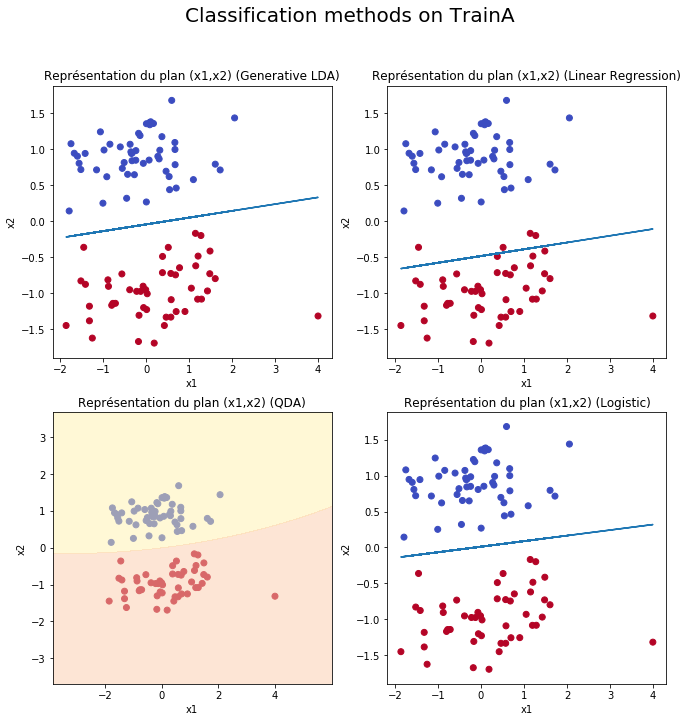

In [24]:
Affichage_graph(df_A,'Classification methods on TrainA')
df_rate[['Model Errors (%) ','trainA']]

,Model Errors (%),trainB
0,LDA,2.0
1,Logistic Regression,1.0
2,Linear Regression,5.5
3,QDA,1.5


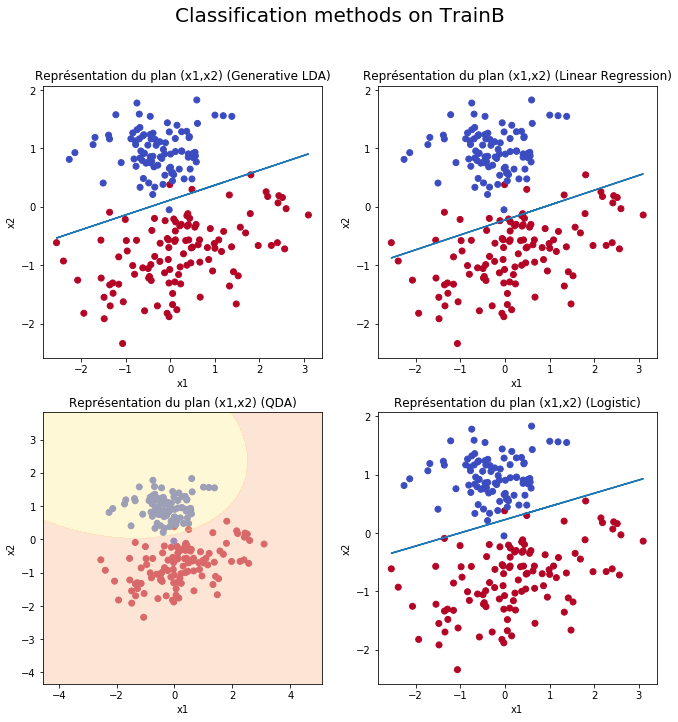

In [26]:
Affichage_graph(df_B,'Classification methods on TrainB')
df_rate[['Model Errors (%) ' ,'trainB']]

,Model Errors (%),trainC
0,LDA,2.6600
1,Logistic Regression,3.0000
2,Linear Regression,6.3333
3,QDA,2.6600


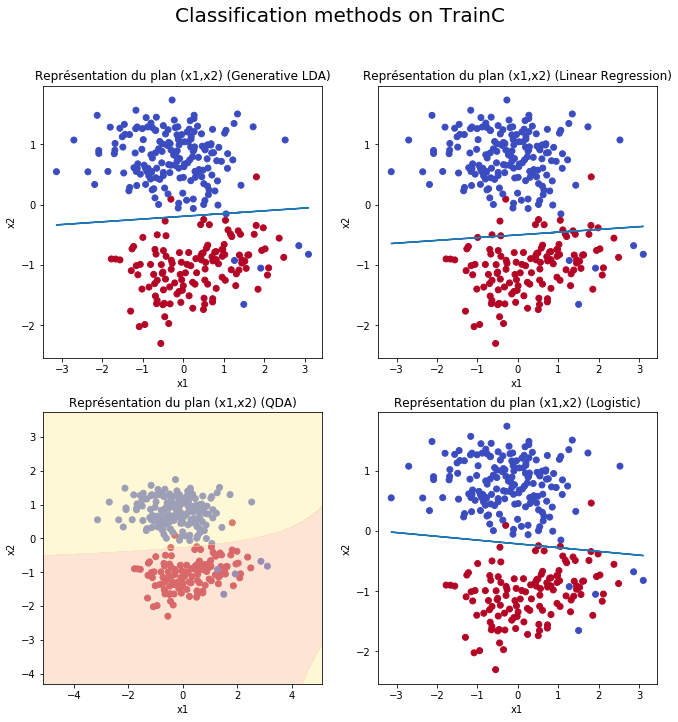

In [27]:
Affichage_graph(df_C,'Classification methods on TrainC')
df_rate[['Model Errors (%) ','trainC']]

,Model Errors (%),testA
0,LDA,1.0
1,Logistic Regression,1.0
2,Linear Regression,5.0
3,QDA,1.0


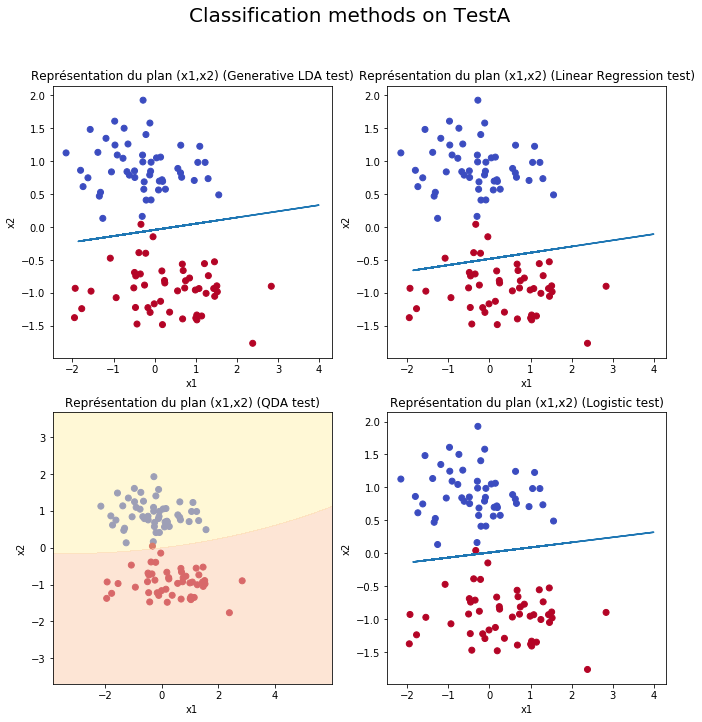

In [28]:
Affichage_graph_test(df_A,df_testA,'Classification methods on TestA')
df_rate[['Model Errors (%) ','testA']]

,Model Errors (%),testB
0,LDA,3.5
1,Logistic Regression,3.5
2,Linear Regression,6.0
3,QDA,4.0


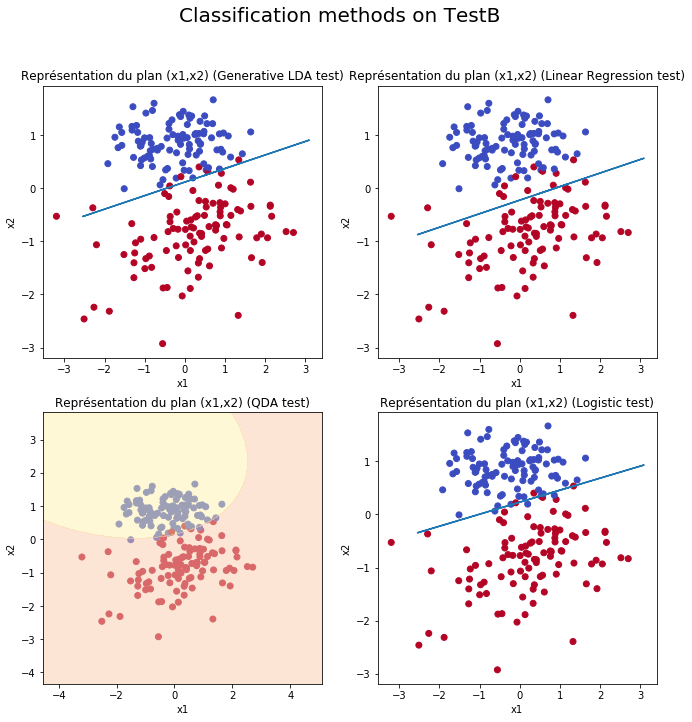

In [29]:
Affichage_graph_test(df_B,df_testB,'Classification methods on TestB')
df_rate[['Model Errors (%) ','testB']]

,Model Errors (%),testC
0,LDA,5.00
1,Logistic Regression,6.66
2,Linear Regression,9.33
3,QDA,6.33


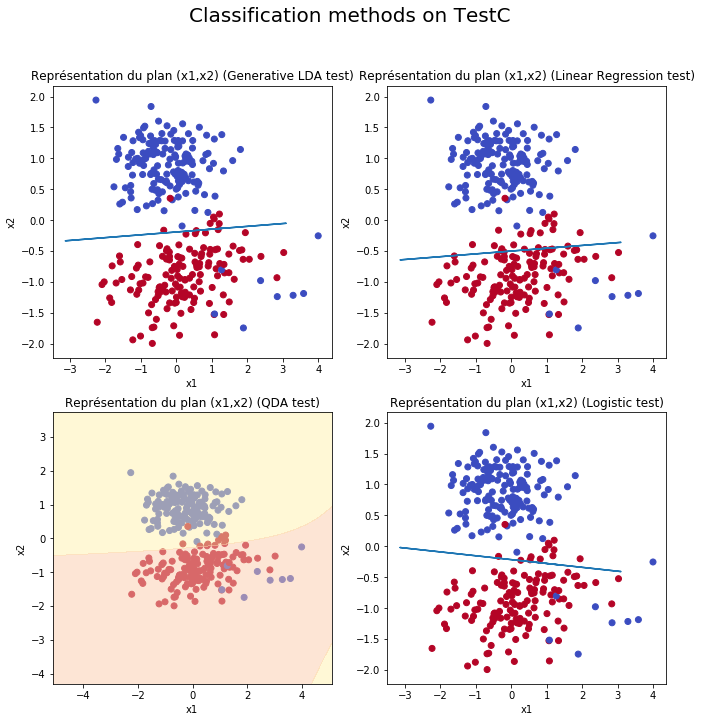

In [30]:
Affichage_graph_test(df_C,df_testC,'Classification methods on TestC')
df_rate[['Model Errors (%) ','testC']]

In [ ]:
df_testC.describe()

In [ ]:
df_C.describe()